In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [2]:
heart_df = pd.read_csv("data/heart.csv")    # heart.csv 파일 불러오기

In [3]:
heart_df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   52    1   1       118   186    0        2      190      0      0.0   
299   43    0   4       132   341    1        2      136      1      3.0   
300   65    1   4       135   254    0        2      127      0      2.8   
301   48    1   4       130   256    1        2      150      1      0.0   
302   63    0   4       150   407    0        2      154      0      4.0   

     slope  ca        thal  target  
0        3   0      

In [4]:
heart_df.shape

(303, 14)

In [5]:
heart_df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [6]:
heart_df.describe() # 기초 통계량 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [7]:
# 데이터 프레임의 컬럼명 확인
heart_df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [8]:
# 결측치 개수 확인
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

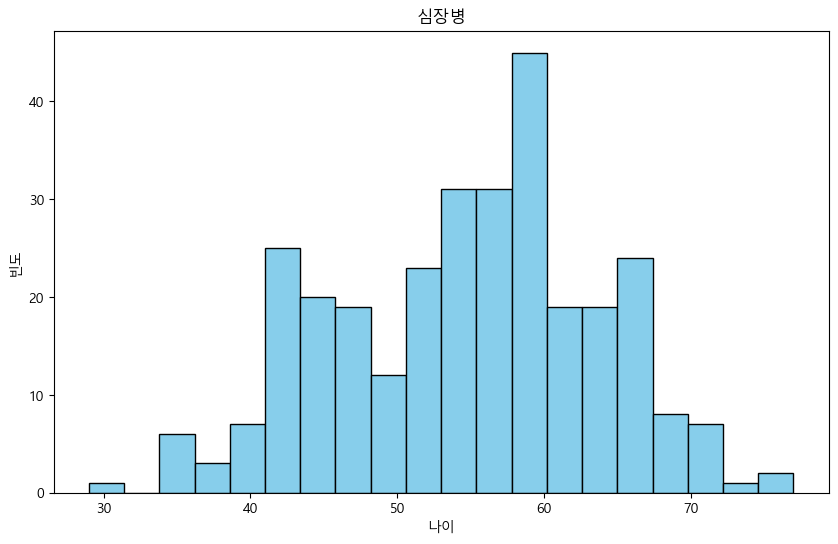

In [9]:
plt.figure(figsize=(10, 6))
plt.title("심장병")
plt.hist(heart_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("나이")
plt.ylabel ("빈도")
plt.show()

In [10]:
#데이터에서 숫자로 된 열(컬럼)만 골라내서 목록으로 변환
numeric_cols = heart_df.select_dtypes(include='number').columns.tolist()

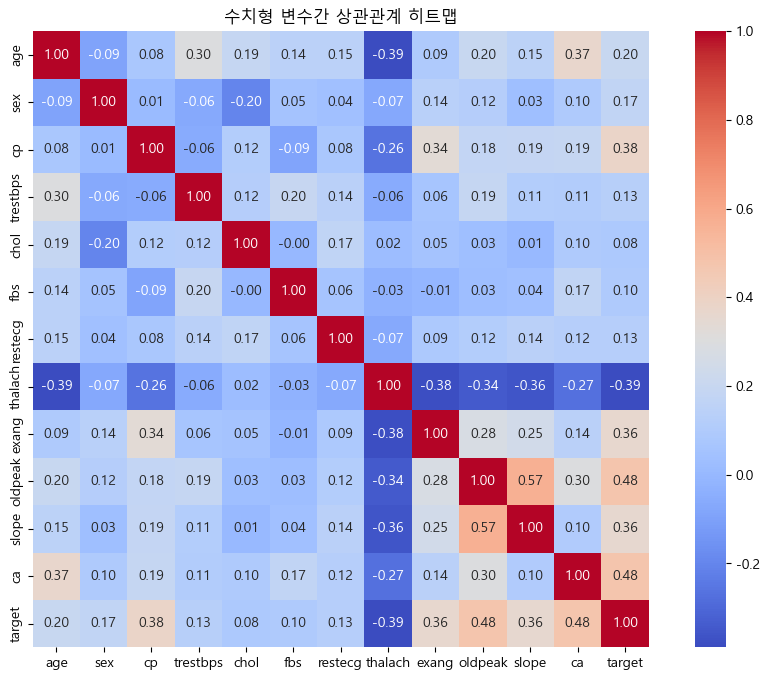

In [11]:
#수치형 변수간 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, annot_kws={"size": 10})
plt.title('수치형 변수간 상관관계 히트맵')
plt.show()

### 히트맵 해석 방법
- 상관계수(correlation coefficent)는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 강한 양의 상관관계로 해석
- 대각선은 항상 1로, 자기 자신과의 상관관계이기 때문에 1
- 상관계수가 0에 가까울수록 두 변수 간의 관계가
    - ***1***에 가까울수록 진한 빨간색 -> 강한 양의 상관 관계
    - ***-1***에 가까울수록 진한 파란색 -> 강한 음의 상관 관계
    - ***0***에 가까울수록 연관성이 낮음 -> 연한색

### 데이터셋 변수 정리
- age : 나이
- sex : 성별(0=여자, 1=남자)
- cp : chest pain type : 가슴 통증 유형
- trestbps : 휴식시 혈압(resting blood pressure)
- chol : 콜레스테롤
- fbs : 공복 혈당
- restecg : 안정심전도 결과
- thalach : 최대 심박수
- exang : 운동으로 인한 협심증 여부 (0=No, 1=True)
- oldpeak : 운동으로 인한 ST depression
- slope : 운동 중 ST depression 기울기
- ca : 형광 투시로 관찰된 주요 혈관수
- thal : 지중해 빈혈 여부
- target : 심장병 여부 (0=없음, 1=있음)

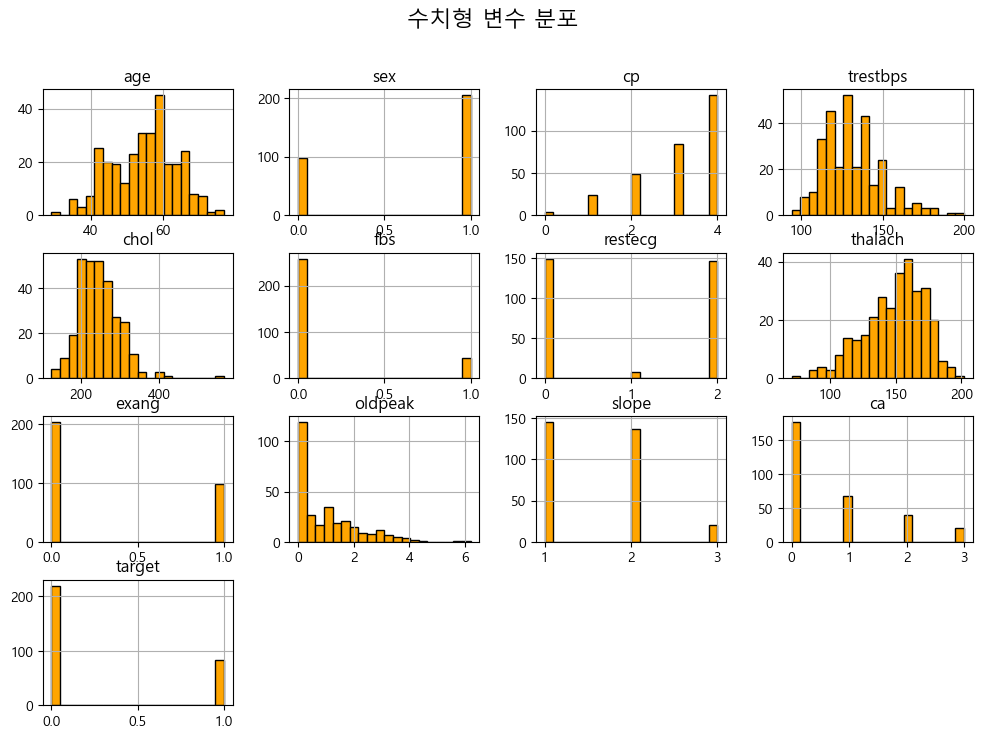

In [12]:
# 데이터 시각화 - 데이터 분호
heart_df.hist(bins=20, figsize=(12,8), color='orange', edgecolor='black')
plt.suptitle("수치형 변수 분포", fontsize=16)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24460\2786769910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_df, x='target', palette='Blues')


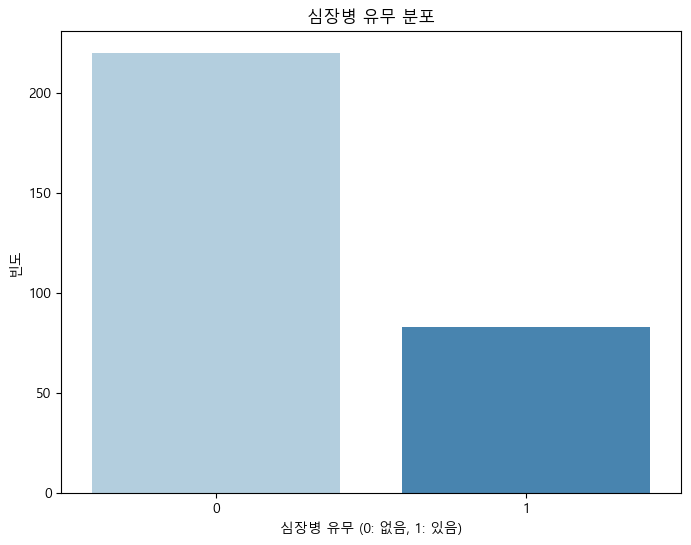

In [13]:
# 타겟(심장별 유무) 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_df, x='target', palette='Blues')
plt.title("심장병 유무 분포")
plt.xlabel("심장병 유무 (0: 없음, 1: 있음)")
plt.ylabel("빈도")
plt.show()

In [14]:
# 학습 데이터 처리 : 수치형 데이터
from tensorflow.keras.layers import Normalization

In [15]:
# 수치형 변수들만 선택
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_data = heart_df[num_col].to_numpy()

In [16]:
num_norm_layer = Normalization()
num_norm_layer.adapt(num_data)
num_normed = num_norm_layer(num_data)

In [17]:
# 평균과 표준편차 확인
print(f"평균: {num_norm_layer.mean.numpy()}")
print(f"표준 편차: {num_norm_layer.variance.numpy() ** 0.5}")

평균: [[ 54.594067  131.78549   246.54785   149.19473     1.0577558]]
표준 편차: [[ 9.001479  17.719025  52.089756  23.135096   1.1631006]]


In [18]:
heart_df[num_col]

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,52,118,186,190,0.0
299,43,132,341,136,3.0
300,65,135,254,127,2.8
301,48,130,256,150,0.0


In [19]:
pd.DataFrame(num_normed.numpy(), columns=num_col)

,age,trestbps,chol,thalach,oldpeak
0,0.933839,0.745781,-0.260087,0.034807,1.068045
1,1.378211,1.592329,0.757388,-1.780617,0.380229
2,1.378211,-0.665132,-0.336877,-0.872905,1.325976
3,-1.954575,-0.100767,0.066273,1.634109,2.099770
4,-1.510204,-0.100767,-0.816818,0.985743,0.294252
...,...,...,...,...,...
298,-0.288182,-0.778005,-1.162375,1.763782,-0.909428
299,-1.288018,0.012106,1.813258,-0.570334,1.669885
300,1.156025,0.181416,0.143064,-0.959353,1.497931
301,-0.732554,-0.100767,0.181459,0.034807,-0.909428


In [20]:
# 문자 범주형 클래스
# 데이터 개수 확인

heart_df['target'].value_counts()

target
0    220
1     83
Name: count, dtype: int64

In [21]:
heart_df['thal'].value_counts()

thal
normal        168
reversible    115
fixed          18
1               1
2               1
Name: count, dtype: int64